In [45]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

In [2]:
# Read in your dataset, determine how many samples are present, and ID any missing data
credit = pd.read_csv('data/credit.csv')

In [11]:
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [12]:
credit.count()

Unnamed: 0    400
Income        400
Limit         400
Rating        400
Cards         400
Age           400
Education     400
Gender        400
Student       400
Married       400
Ethnicity     400
Balance       400
dtype: int64

There are 400 observations in the credit dataset.

In [13]:
credit.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [14]:
credit.std()

Unnamed: 0     115.614301
Income          35.244273
Limit         2308.198848
Rating         154.724143
Cards            1.371275
Age             17.249807
Education        3.125207
Balance        459.758877
dtype: float64

Limit, Rating and Balance have a higher std compared to the other variables as the range of values and mean are higher for these variables.

In [19]:
credit.isnull().sum()

Unnamed: 0    0
Income        0
Limit         0
Rating        0
Cards         0
Age           0
Education     0
Gender        0
Student       0
Married       0
Ethnicity     0
Balance       0
dtype: int64

There are no null values in any of the variables.

<IPython.core.display.Javascript object>


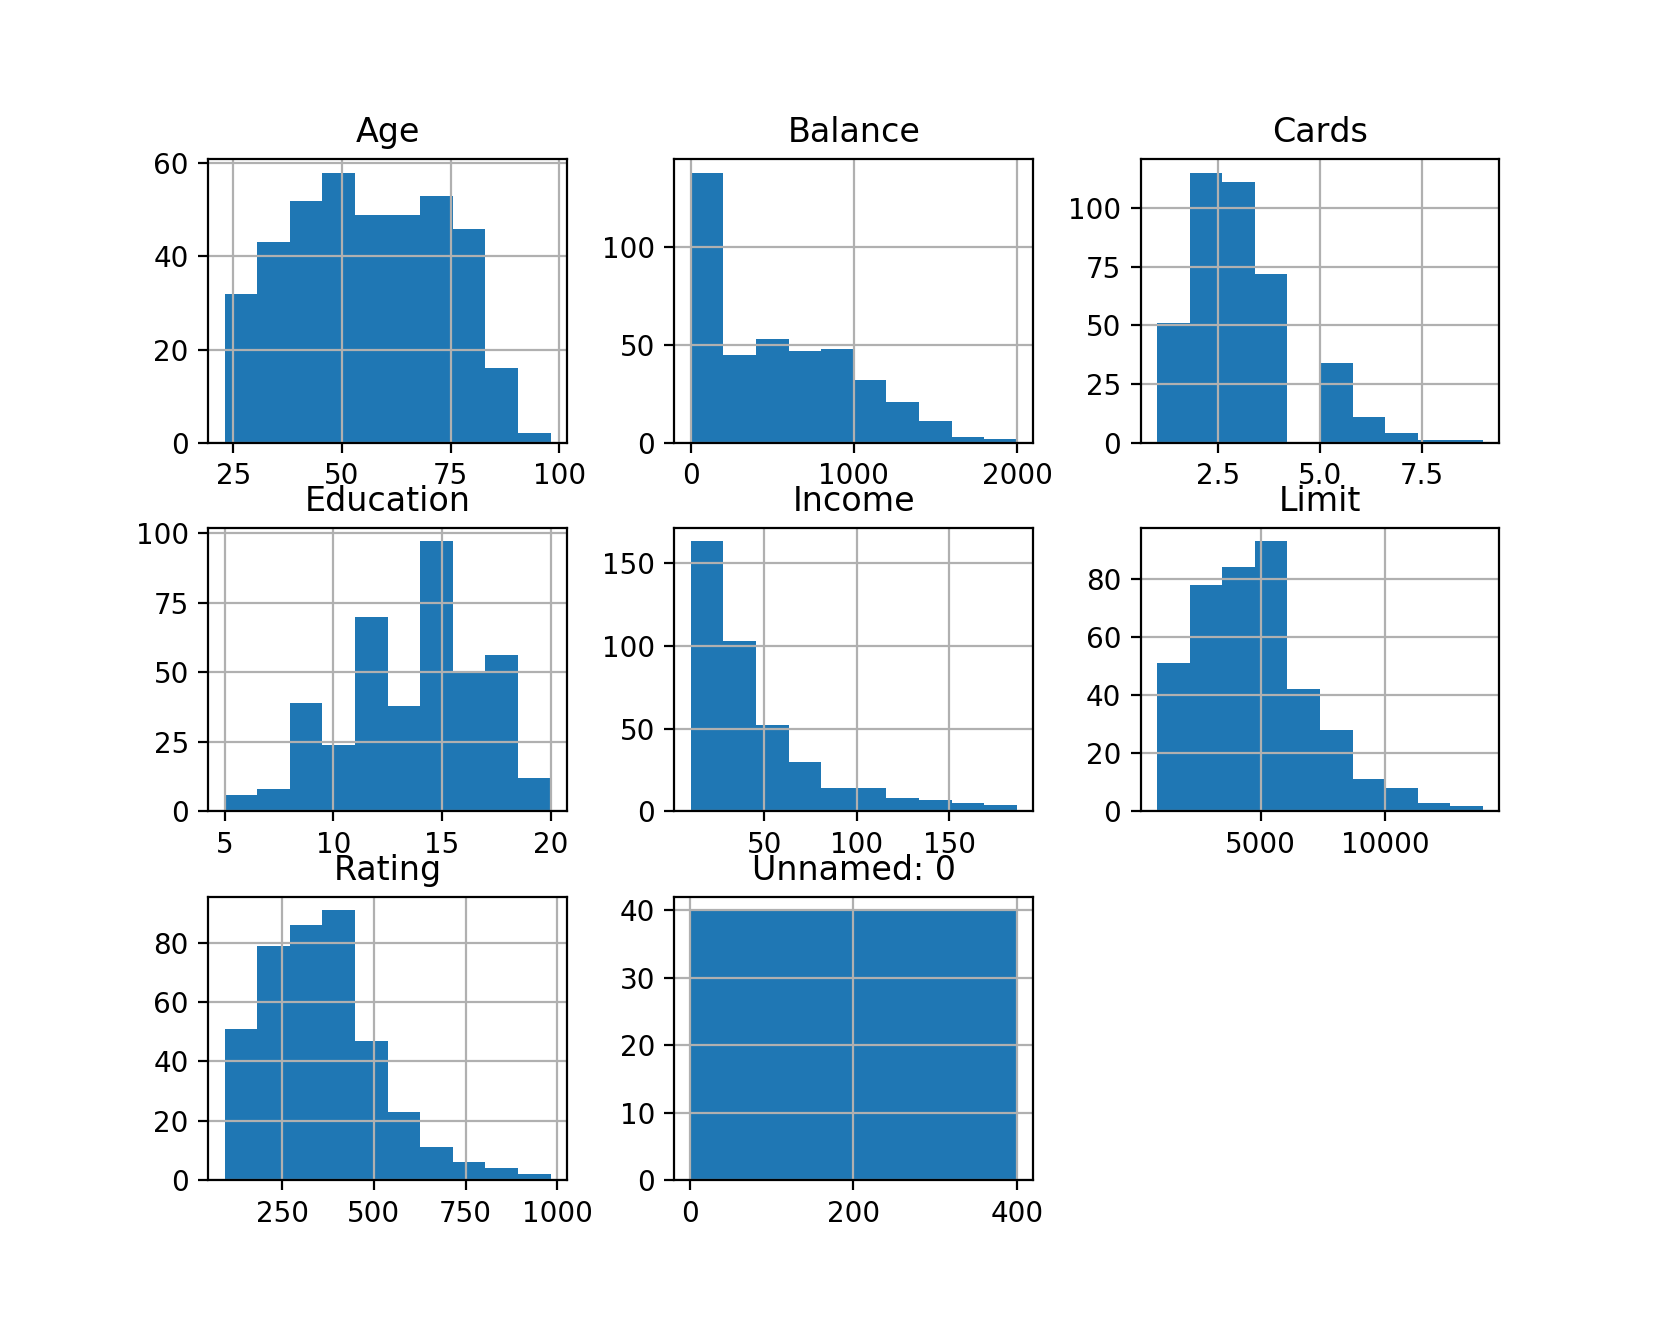

In [46]:
credit.hist()
pl.show()

Age, Balance, Income, Limit and Rating can be considered normally distributed, however the variables are skewed towards the lower ranges.  The remaining variables are not normally distributed. Education and Cards are possible candidates for transformation to meet the requirement of normal distribution. 

In [49]:
%matplotlib inline

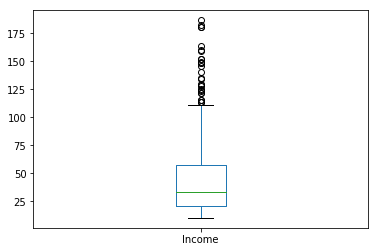

In [50]:
credit['Income'].plot(kind='box')

The boxplot shows the following descriptive statistics: min, max and median.  In addition it shows the 25th and 75th percentiles and outliers.
The income boxplot shows a median of 30.  Data shows income outliers above 100.

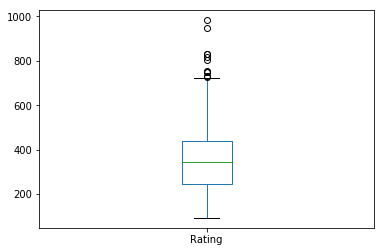

In [53]:
credit['Rating'].plot(kind='box')

The boxplot shows the following descriptive statistics: min, max and median.  In addition it shows the 25th and 75th percentiles and outliers.
The rating boxplot shows a median of 345.  Data shows rating outliers above 700.

In [38]:
credit.corr()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
Unnamed: 0,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
Income,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


The following variables are highly correlated:
-Income and Limit
-Income and Rating
-Limit and Balance 
-Limit and Rating 
-Rating and Balance 
The following variables shows inverse correlation: 
-Education to all of the variables except for Age and Balance which shows no correlation.
-Cards and Income

The following variables are not correlated:
-Balance and Age

In [52]:
credit.skew()

Unnamed: 0    0.000000
Income        1.742117
Limit         0.837493
Rating        0.865394
Cards         0.791928
Age           0.011496
Education    -0.329212
Balance       0.584595
dtype: float64

Hypothesis: A higher credit limit is given to those who have a higher income and rating.